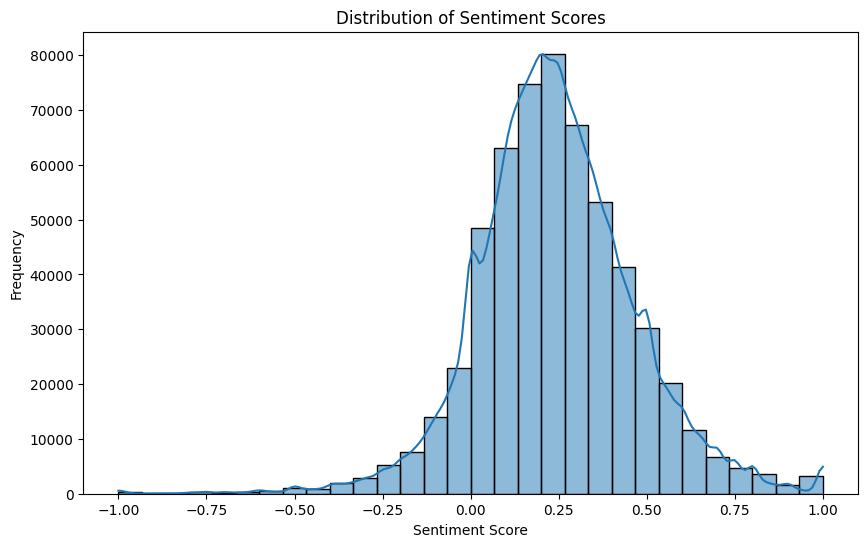

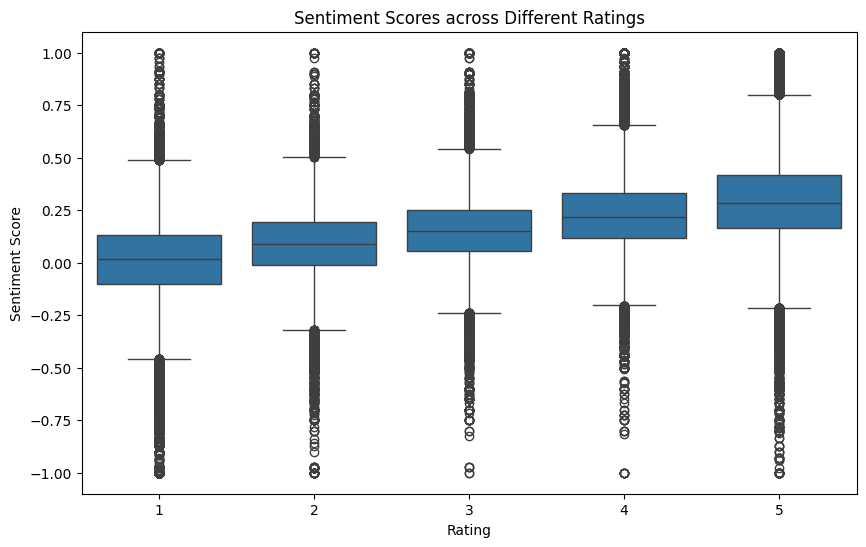

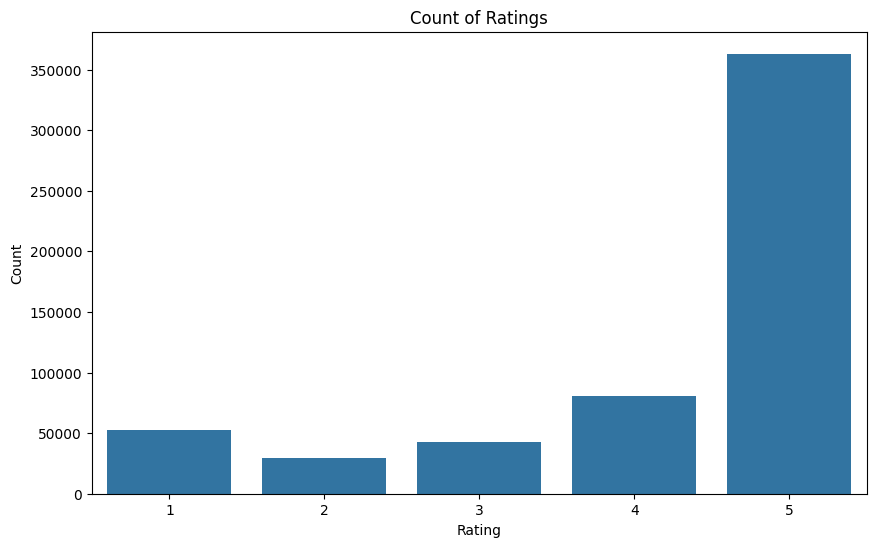

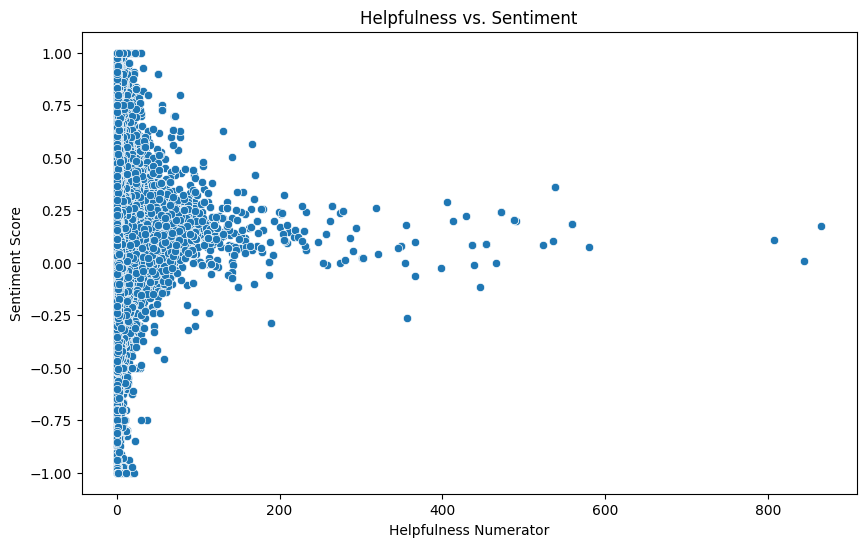

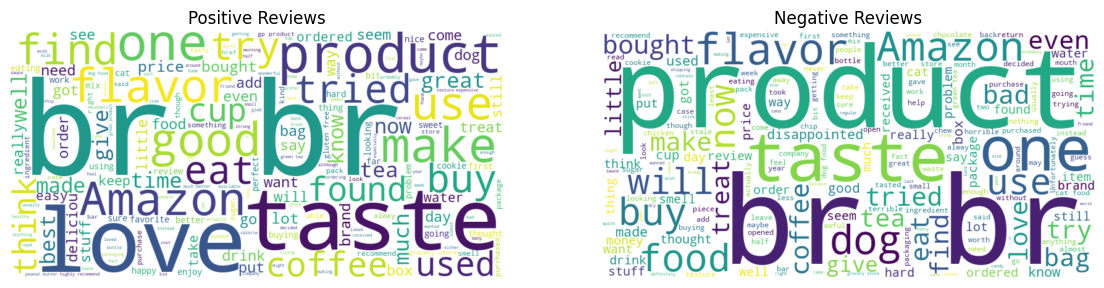

In [2]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Step 1: Load the cleaned dataset
data = pd.read_csv('../data/cleaned-amazon-reviews.csv')

# Step 2: Sentiment Analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Add sentiment score to the dataset if not already added
if 'Sentiment' not in data.columns:
    data['Sentiment'] = data['Text'].apply(get_sentiment)

# Step 3: Plot Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Step 4: Plot Sentiment Scores across Different Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Sentiment', data=data)
plt.title('Sentiment Scores across Different Ratings')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

# Step 5: Count Plot of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=data)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Step 6: Helpfulness vs. Sentiment Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HelpfulnessNumerator', y='Sentiment', data=data)
plt.title('Helpfulness vs. Sentiment')
plt.xlabel('Helpfulness Numerator')
plt.ylabel('Sentiment Score')
plt.show()

# Step 7: Word Cloud of Positive and Negative Reviews
# Generate word cloud for positive and negative reviews
positive_reviews = ' '.join(data[data['Sentiment'] > 0]['Text'])
negative_reviews = ' '.join(data[data['Sentiment'] < 0]['Text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()